<a href="https://colab.research.google.com/github/augustxj/Kidney-stone-YOLOV8/blob/main/YOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
YOLO("yolov8n.pt").info()

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2Spn05v61sbzRB8uG2F6")
project = rf.workspace("kidney-ktlmt").project("kidney-stone-ultrasound")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
!cat /content/kidney-stone-ultrasound-1/data.yaml

names:
- kidney-stone
nc: 1
roboflow:
  license: CC BY 4.0
  project: kidney-stone-ultrasound
  url: https://universe.roboflow.com/kidney-ktlmt/kidney-stone-ultrasound/dataset/1
  version: 1
  workspace: kidney-ktlmt
test: ../test/images
train: ../train/images
val: ../valid/images


In [5]:
from ultralytics import YOLO

# Carregar o modelo YOLOv8
model = YOLO("yolov8n.pt")  # Modelo pré-treinado

# Treinar o modelo
model.train(data="/content/kidney-stone-ultrasound-1/data.yaml", epochs=5, imgsz=640, batch=16)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/kidney-stone-ultrasound-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/kidney-stone-ultrasound-1/train/labels.cache... 4942 images, 2063 backgrounds, 0 corrupt: 100%|██████████| 4942/4942 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/kidney-stone-ultrasound-1/valid/labels.cache... 260 images, 152 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.689      3.254      1.436         45        640: 100%|██████████| 309/309 [1:06:15<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:18<00:00,  8.77s/it]

                   all        260        419      0.275      0.169      0.148     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      2.538      2.319      1.348         51        640: 100%|██████████| 309/309 [1:05:54<00:00, 12.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:17<00:00,  8.66s/it]

                   all        260        419     0.0338      0.119     0.0199    0.00816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.499       2.14      1.341         50        640: 100%|██████████| 309/309 [1:05:57<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:18<00:00,  8.72s/it]

                   all        260        419      0.363       0.27      0.218     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.433      2.028       1.31         50        640: 100%|██████████| 309/309 [1:05:33<00:00, 12.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:19<00:00,  8.82s/it]

                   all        260        419      0.436      0.303      0.285     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.352      1.893      1.281         32        640: 100%|██████████| 309/309 [1:05:37<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:18<00:00,  8.77s/it]

                   all        260        419      0.508      0.325      0.321      0.117



5 epochs completed in 5.601 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:12<00:00,  8.03s/it]


                   all        260        419      0.502      0.327      0.321      0.117
Speed: 9.5ms preprocess, 258.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f8486013d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/kidney-stone-ultrasound-1/valid/labels.cache... 260 images, 152 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:11<00:00,  4.21s/it]


                   all        260        419      0.502      0.327      0.321      0.117
Speed: 3.7ms preprocess, 261.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f8482863d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.

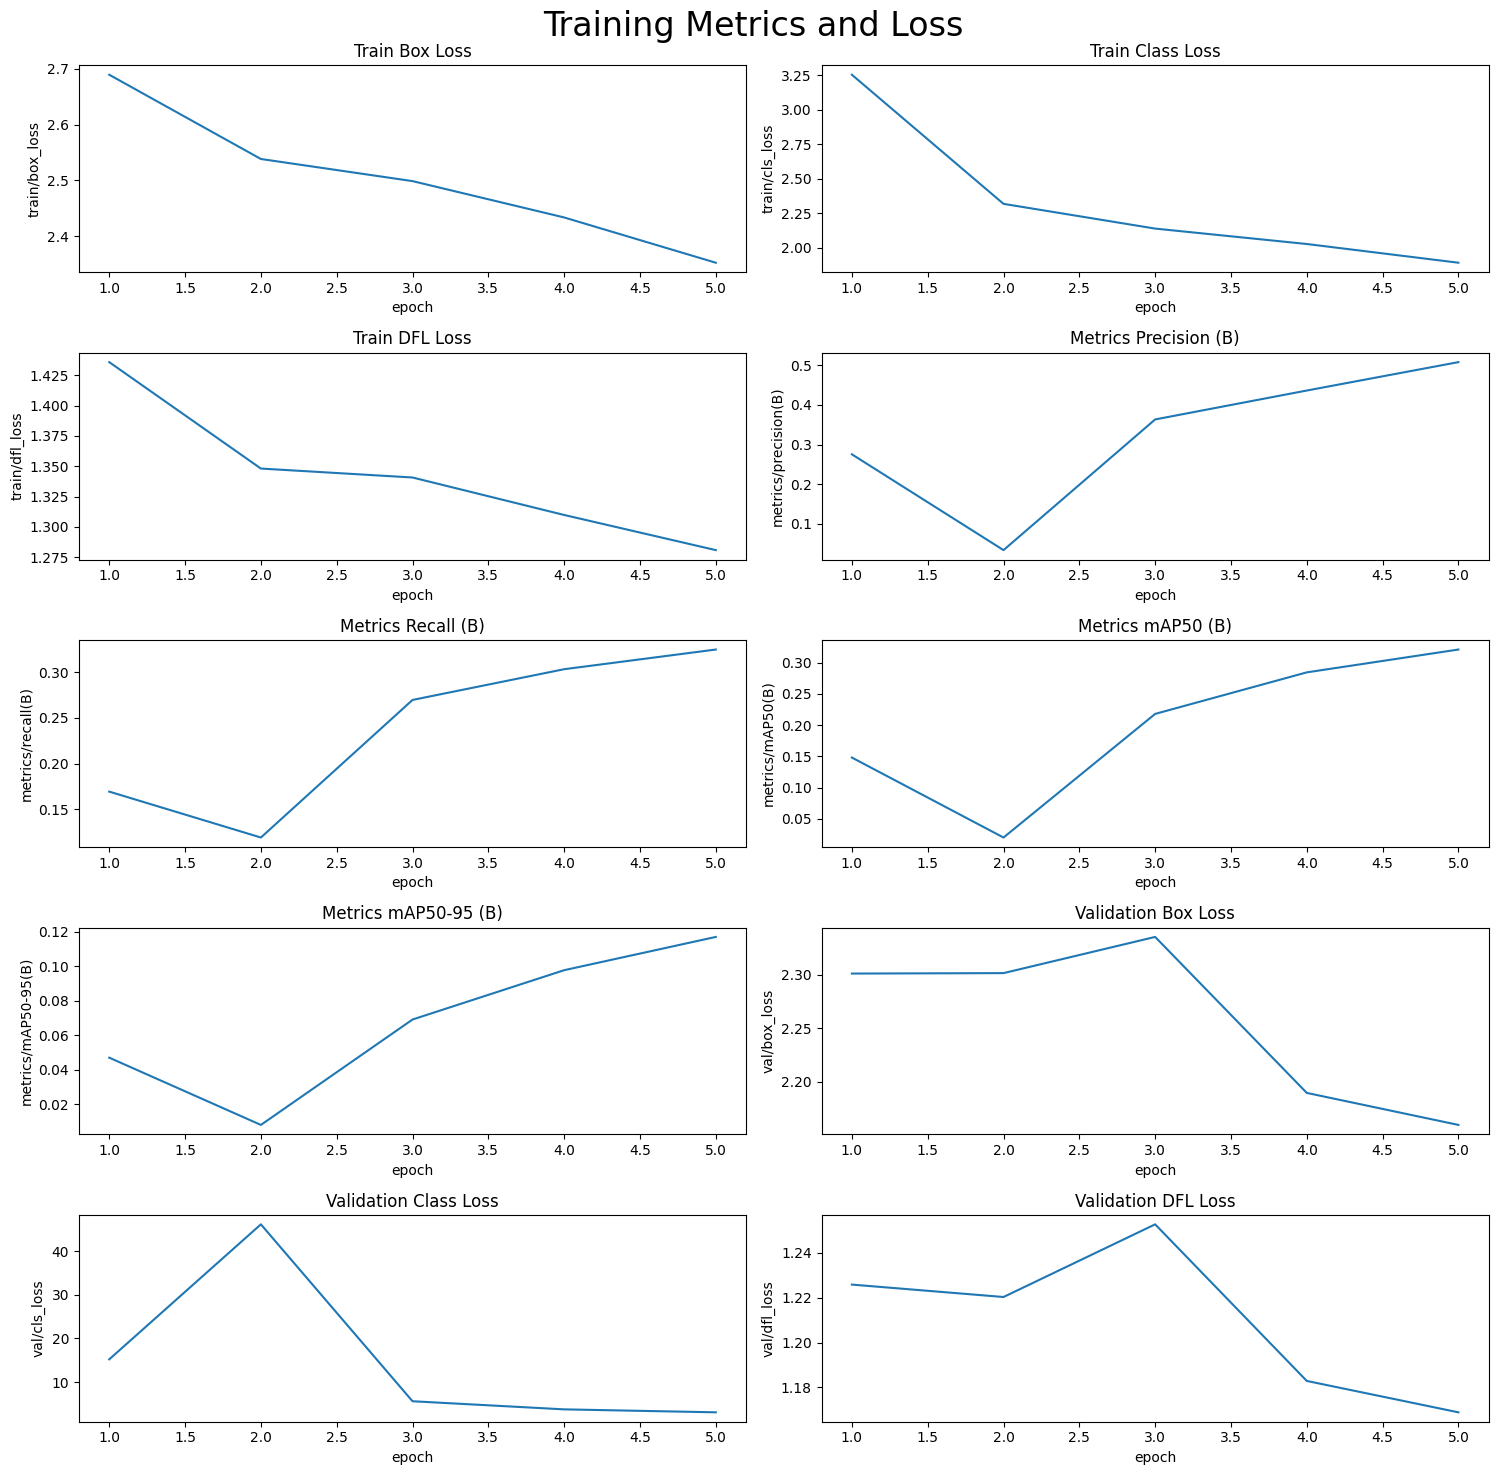

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/runs/detect/train2/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

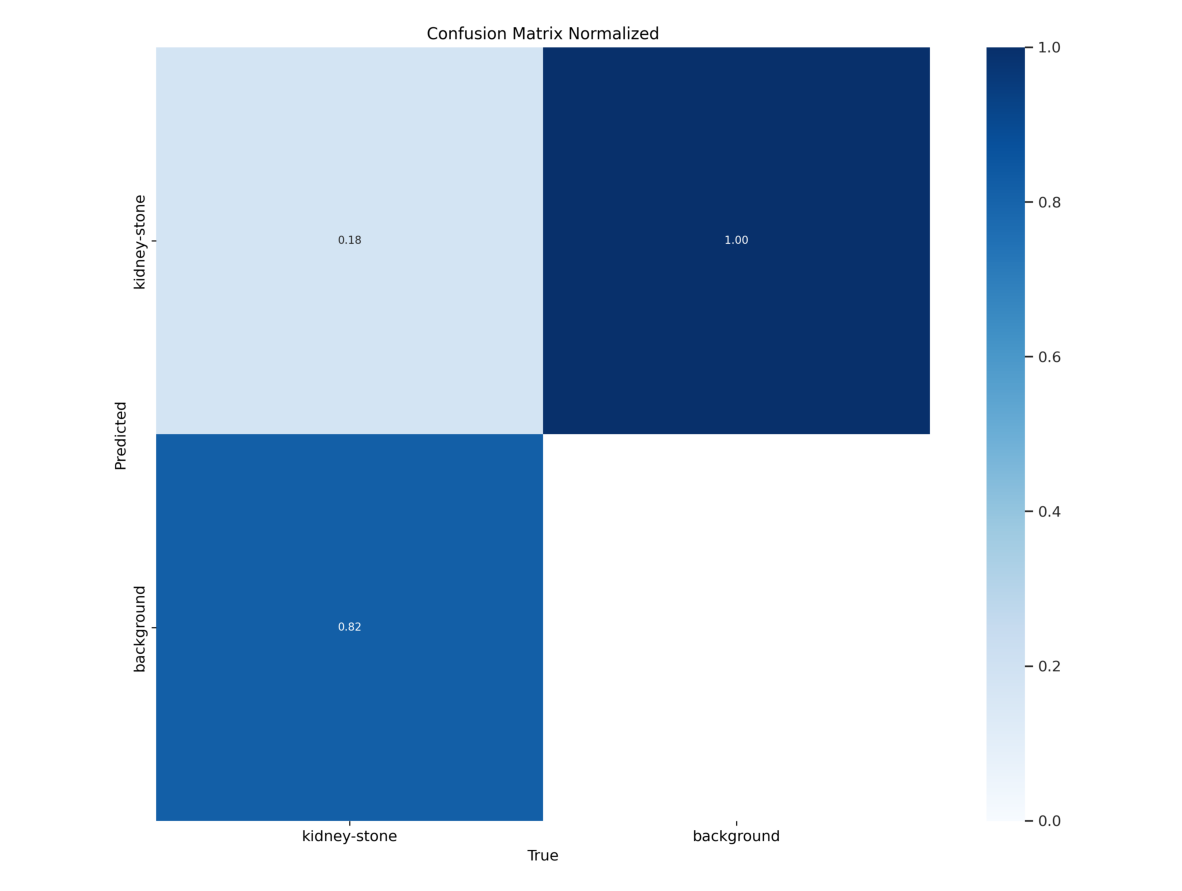

In [12]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/train2/confusion_matrix_normalized.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [16]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data="/content/kidney-stone-ultrasound-1/data.yaml" split=test


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/kidney-stone-ultrasound-1/test/labels... 229 images, 110 backgrounds, 0 corrupt: 100% 229/229 [00:00<00:00, 878.59it/s]
val: New cache created: /content/kidney-stone-ultrasound-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [01:03<00:00,  4.25s/it]
                   all        229        339      0.498      0.413      0.425      0.163
Speed: 6.6ms preprocess, 263.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


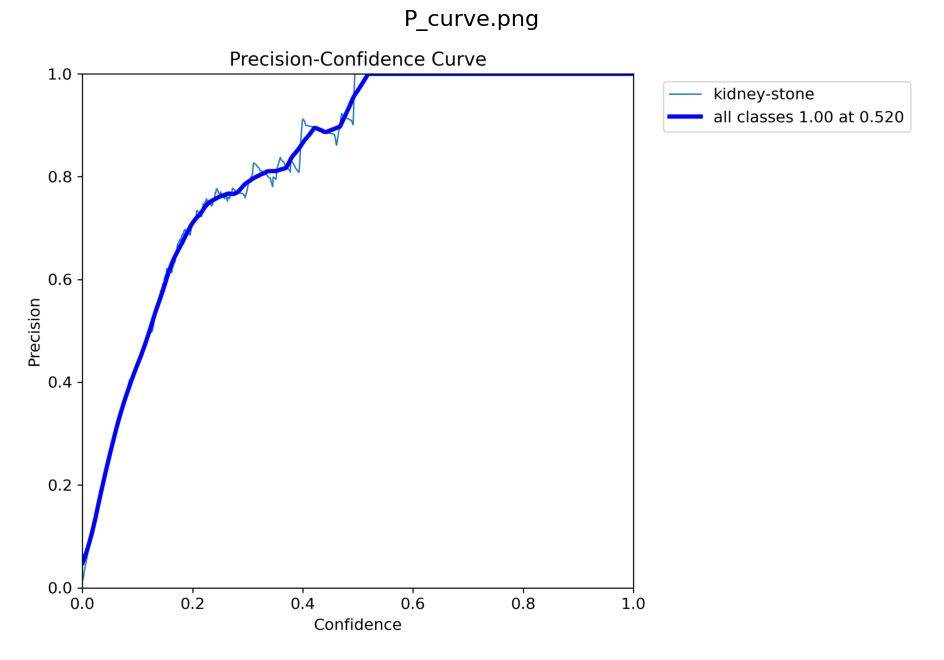

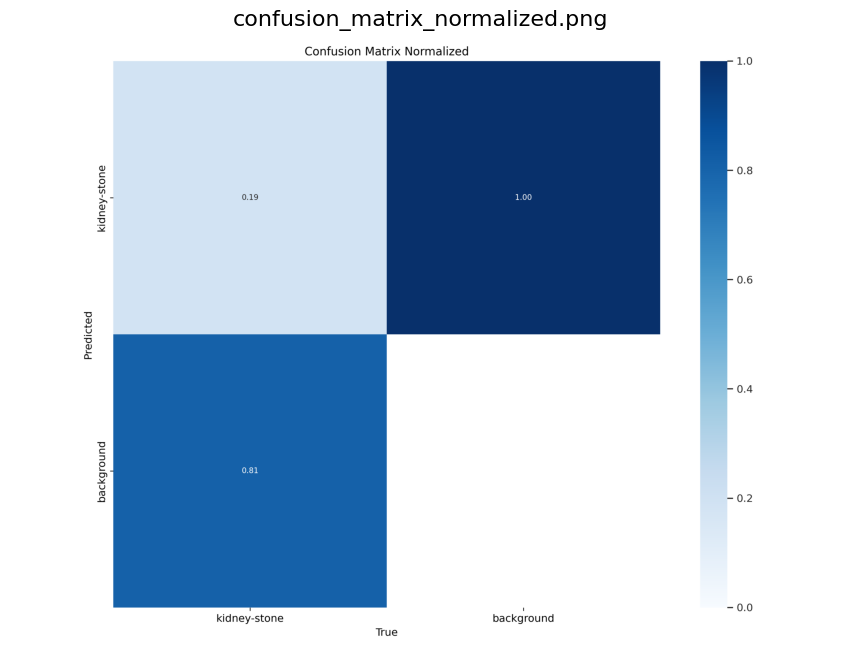

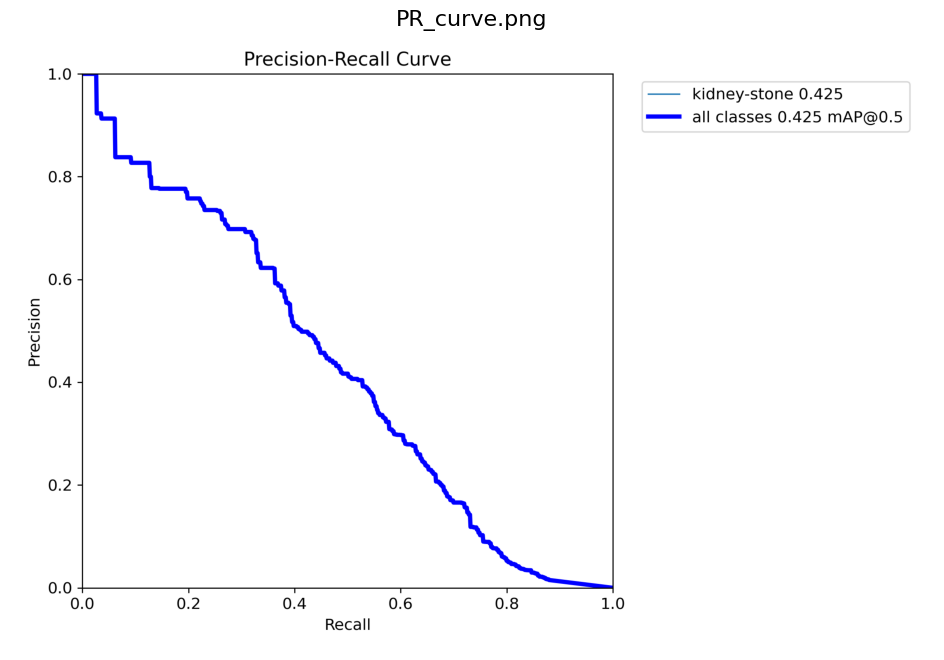

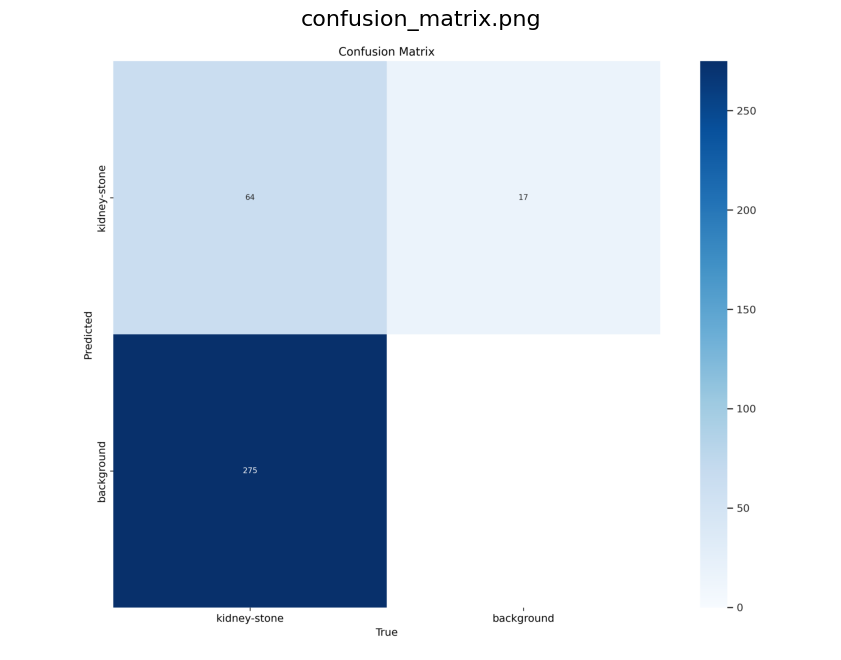

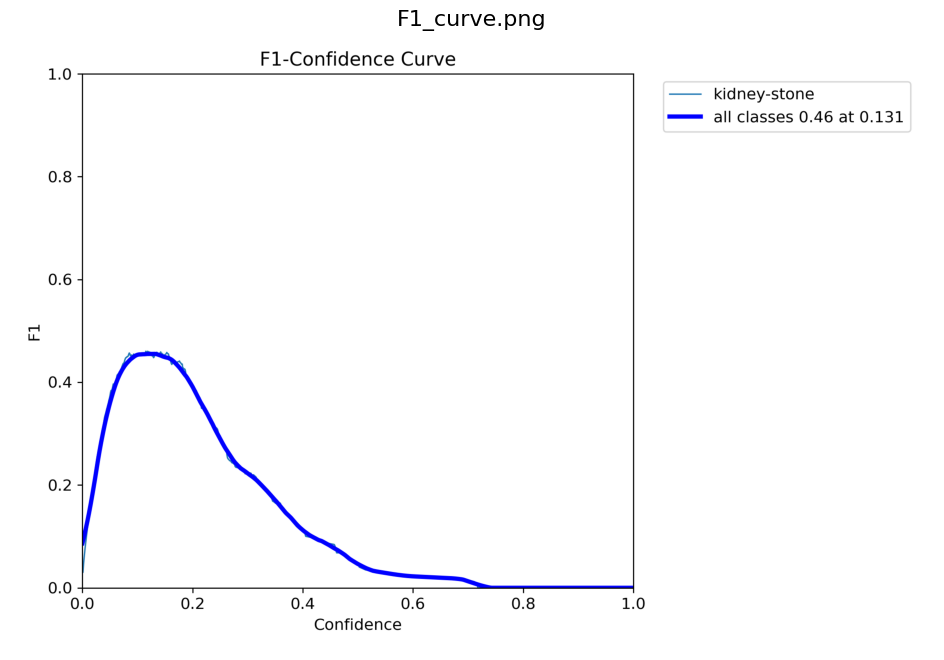

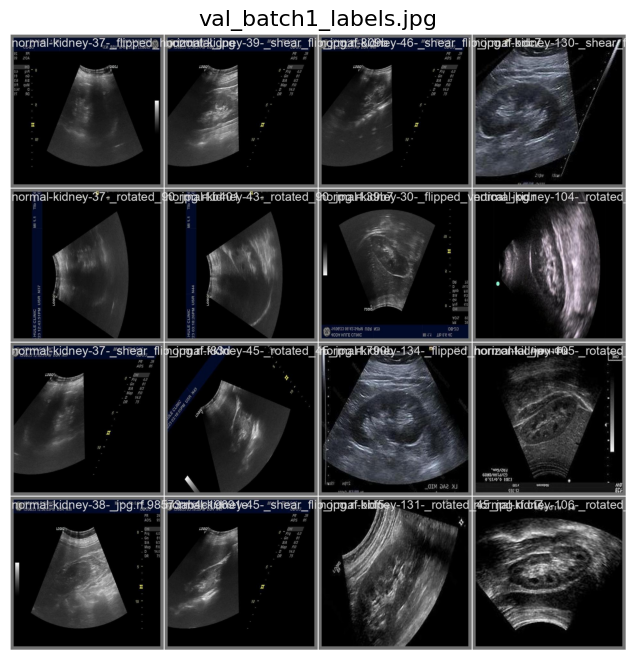

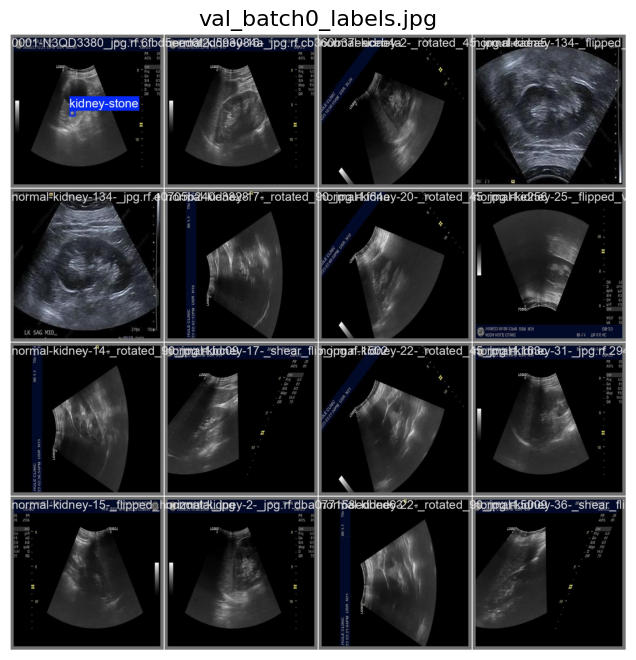

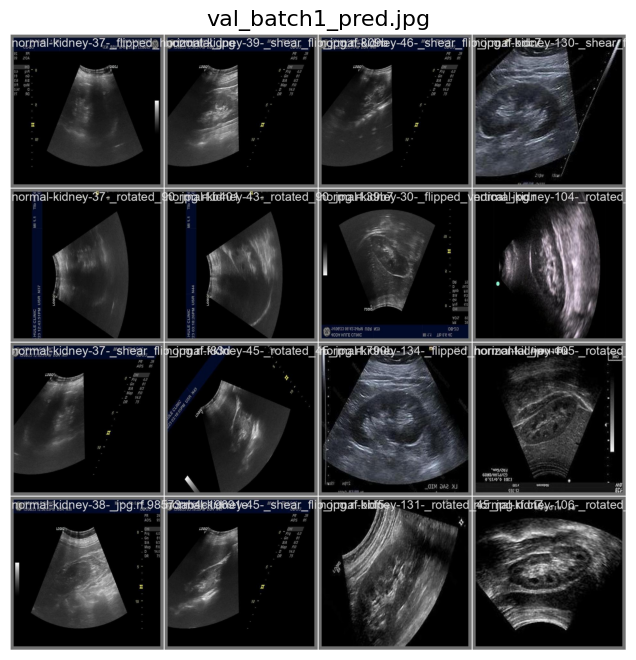

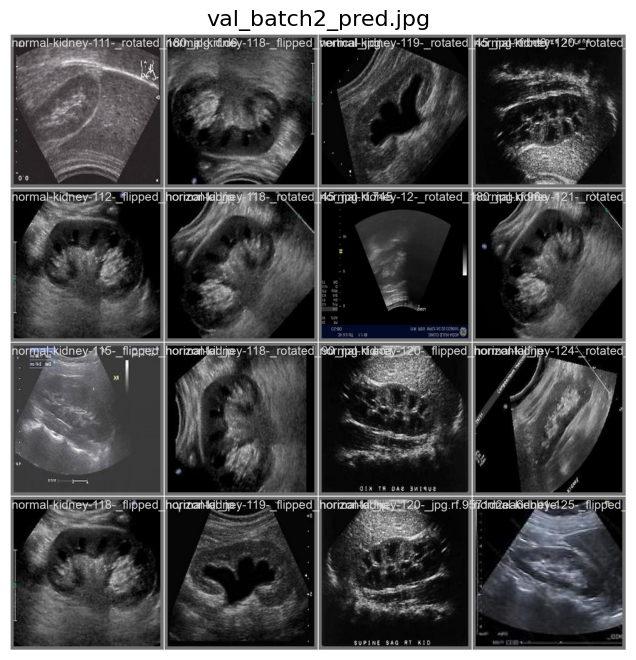

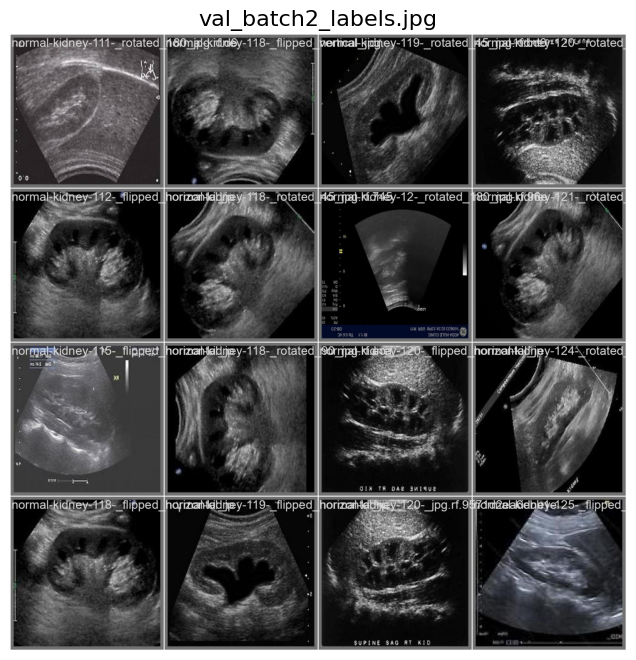

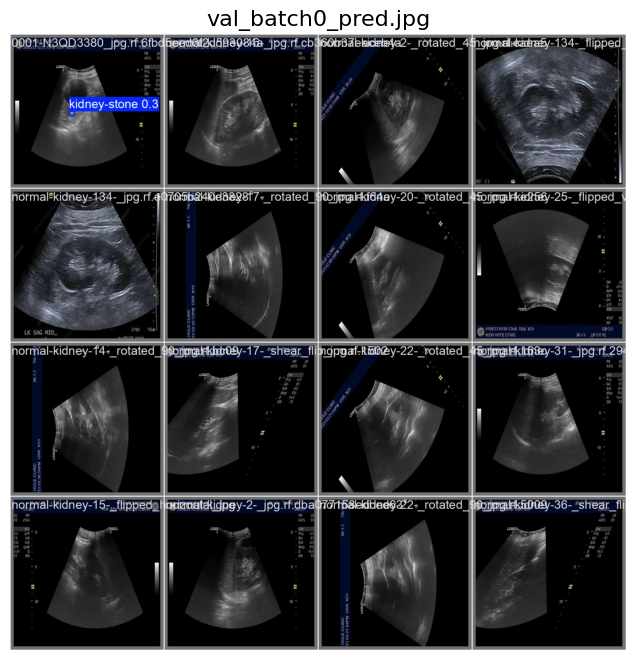

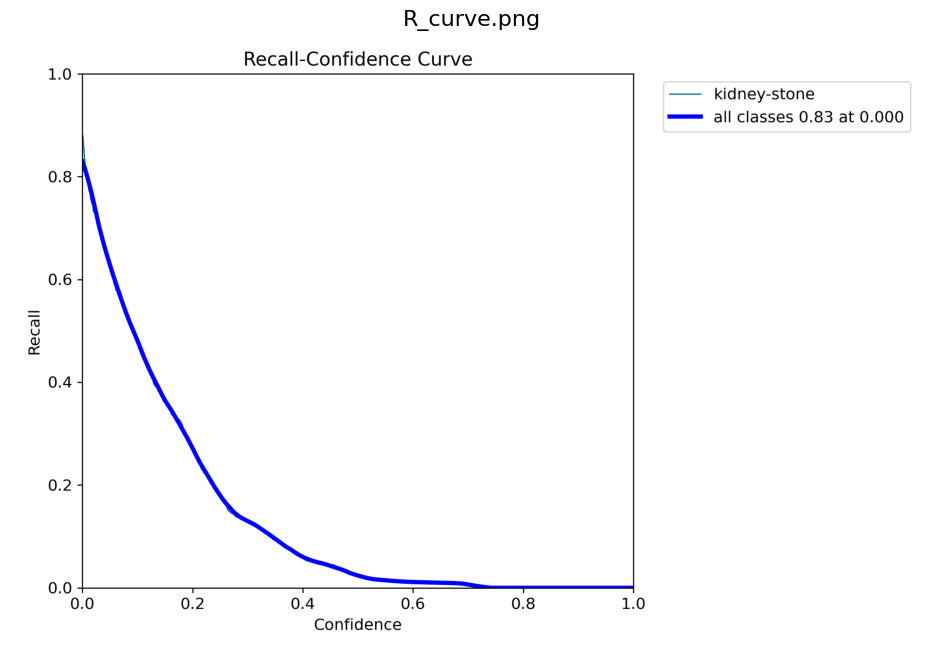

In [23]:
import matplotlib.pyplot as plt
import os

# Caminho para o diretório das imagens
image_dir = "/content/runs/detect/val"

# Listar os arquivos de imagem disponíveis no diretório
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg'))]

# Plotar cada imagem separadamente
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = plt.imread(image_path)

    # Mostrar a imagem
    plt.figure(figsize=(12, 8))  # Aumentar o tamanho da figura
    plt.imshow(img)
    plt.title(image_file, fontsize=16)  # Título com tamanho maior
    plt.axis('off')  # Ocultar os eixos
    plt.show()


In [24]:
# Carregar os resultados do arquivo CSV gerado pelo YOLO
results_csv_path = "runs/detect/train2/results.csv"
results = pd.read_csv(results_csv_path)

# Plotar Precision, Recall e mAP
plt.figure(figsize=(10, 6))
plt.plot(results["epoch"], results["precision"], label="Precision")
plt.plot(results["epoch"], results["recall"], label="Recall")
plt.plot(results["epoch"], results["mAP50"], label="mAP@0.5")
plt.plot(results["epoch"], results["mAP50-95"], label="mAP@0.5:0.95")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Metrics During Training")
plt.legend()
plt.grid()
plt.show()


KeyError: 'precision'

<Figure size 1000x600 with 0 Axes>


image 1/1 /content/kidney-stone-ultrasound-1/test/images/0001-N3QD3380_jpg.rf.6fbd5eed6f2d593084af568fcfdbc80a.jpg: 640x640 1 kidney-stone, 207.6ms
Speed: 4.2ms preprocess, 207.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train219


array([[[38, 10,  3],
        [38, 10,  3],
        [39, 10,  3],
        ...,
        [41, 10,  1],
        [41, 10,  1],
        [41, 10,  1]],

       [[38, 10,  3],
        [38, 10,  3],
        [39, 10,  3],
        ...,
        [41, 10,  1],
        [41, 10,  1],
        [41, 10,  1]],

       [[39, 10,  3],
        [39, 10,  3],
        [41,  9,  3],
        ...,
        [41, 10,  1],
        [41, 10,  1],
        [41, 10,  1]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
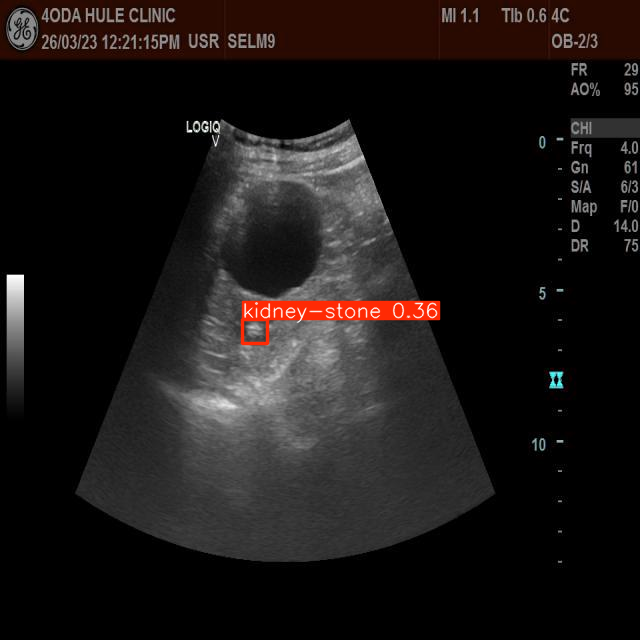

In [30]:
results = model.predict(source="/content/kidney-stone-ultrasound-1/test/images/0001-N3QD3380_jpg.rf.6fbd5eed6f2d593084af568fcfdbc80a.jpg", save=True)
#show the image of results
results[0].plot()